In [1]:
import os
import os.path as op
import mne
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from xml.etree import ElementTree
%matplotlib inline
import math

In [2]:
file_name = 'eyes closed2024.03.11_12.29.58.hdf5'
f = h5py.File(file_name, 'r')
f_keys = list(f.keys())
def printname(name):
    print(name)
#f.visit(printname)
description_data = f.get("RawData/AcquisitionTaskDescription")
description_xml_str = ''
for description in description_data:
    description_xml_str = description.decode('UTF-8')    

In [3]:
#https://mne.tools/dev/auto_tutorials/intro/40_sensor_locations.html

In [4]:
#print(mne.channels.get_builtin_montages())

In [5]:
easycap_montage = mne.channels.make_standard_montage('standard_1020')

In [ ]:
#easycap_montage.plot()

In [6]:
tree = ElementTree.fromstring(description_xml_str)
list_of_channels_names = [ChannelName.text for ChannelName in tree.iter('ChannelName')]

In [7]:
sample_shape = f.get("RawData/Samples").shape
raw_data = np.zeros(sample_shape)
f.get("RawData/Samples").read_direct(raw_data)
f.close()

In [8]:
sampling_freq = 512
ch_type_eeg = ['eeg']*64

In [9]:
list_of_channels_names[:3] = ['Fp1','Fpz','Fp2']

In [10]:
info = mne.create_info(ch_names=list_of_channels_names, ch_types=ch_type_eeg, sfreq=sampling_freq)
raw = mne.io.RawArray(np.transpose(raw_data/1e6), info)

Creating RawArray with float64 data, n_channels=64, n_times=92169
    Range : 0 ... 92168 =      0.000 ...   180.016 secs
Ready.


In [11]:
raw.set_montage(easycap_montage)

<RawArray | 64 x 92169 (180.0 s), ~45.1 MB, data loaded>

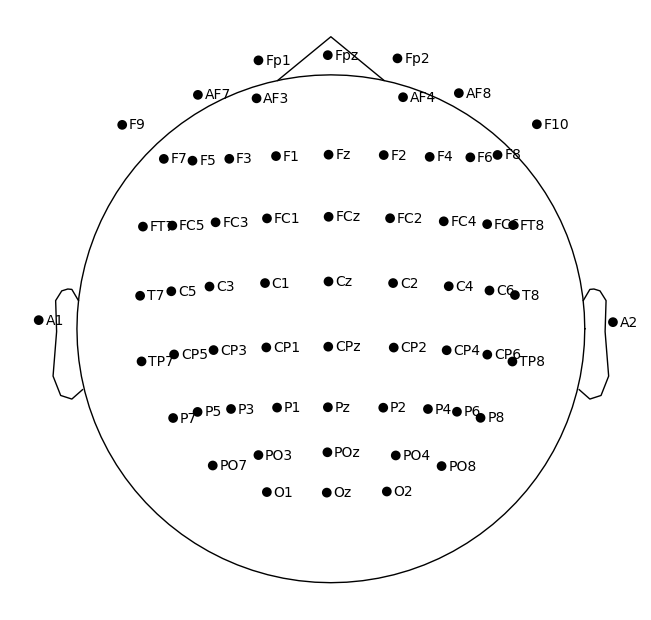

In [12]:
fig = raw.plot_sensors(show_names=True)

In [26]:
def plot_the_eeg_data_subplots(data,title,channel_names,time_range = (0,0),figure_size = (10,18),sampling_freq = 512):
    #plot the eeg data in four subplots(divide data into four parts)
    #display partial time only works for dataframe data
    if type(data) == pd.core.frame.DataFrame:
        if time_range == (0,0):
            selected_time_data = data
        else:
            start,end = time_range
            selected_time_data = data[(data['time']>=start) & (data['time']<=end)]
        x = selected_time_data['time']
        y = selected_time_data.iloc[:,1:]
    elif type(data) == np.ndarray:
        x = np.arange(0, data.shape[0], 1)
        x = x / sampling_freq
        y = data
    #plt.figure(figsize=fig_size)
    fig, axs = plt.subplots(4,figsize= figure_size)
    fig.suptitle(title, y = 0.99)
    num_channels  = len(channel_names)
    NUM_COLORS = math.ceil(num_channels/4)
    num_remaining_channels = num_channels - (3*NUM_COLORS)
    sub_titles = ['First {} Channels'.format(NUM_COLORS),'Second {} Channels'.format(NUM_COLORS),'Third {} Channels'.format(NUM_COLORS),\
                   'Remaining {} Channels'.format(num_remaining_channels)]
    #cm = plt.get_cmap('gist_rainbow')
    colors = plt.cm.Spectral(np.linspace(0,1,NUM_COLORS))
    for i in range(4):
        axs[i].set_prop_cycle(color=colors)
        if type(data) == pd.core.frame.DataFrame:
            axs[i].plot(x,y.iloc[:,i*NUM_COLORS:(i+1)*NUM_COLORS])
        elif type(data) == np.ndarray:
            axs[i].plot(x,y[:,i*NUM_COLORS:(i+1)*NUM_COLORS])
        axs[i].set_title(sub_titles[i])
        axs[i].legend(channel_names[i*NUM_COLORS:(i+1)*NUM_COLORS],loc = 'upper right')
        axs[i].set_xlabel('Time [s]')
        axs[i].set_ylabel('Microvolts [mV]')
    fig.tight_layout()
    plt.show()

In [21]:
def plot_the_eeg_data(data,title,channel_names,time_range = (0,0),fig_size = (12,16),sampling_freq = 512):
    #display eeg data in one figure, if dataframe as input,must contain time
    #display partial channels and partial times only works for dataframe data
    if type(data) == pd.core.frame.DataFrame:
        if time_range == (0,0):
            selected_time_data = data
        else:
            start,end = time_range
            selected_time_data = data[(data['time']>=start) & (data['time']<=end)]
        x = selected_time_data['time']
        y = selected_time_data[channel_names]
    else:
        x = np.arange(0, data.shape[0], 1)
        x = x / sampling_freq
        y = data
    #cm = plt.get_cmap('gist_rainbow')
    plt.figure(figsize=fig_size)
    ax = plt.subplot(111)
    num_channels = len(channel_names)
    colors = plt.cm.Spectral(np.linspace(0,1,num_channels))
    #ax.set_prop_cycle(color=[cm(1.*i/num_channels) for i in range(num_channels)])
    ax.set_prop_cycle(color = colors)
    ax.plot(x, y)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Microvolts [mV]')
    ax.set_title(title)
    ax.legend(channel_names,borderpad=0.2,loc = 'upper right')
    plt.show()

In [19]:
title = 'Plot of the Raw EEG data'
#plot_the_eeg_data(raw_data,title,list_of_channels_names,fig_size = (12,16))

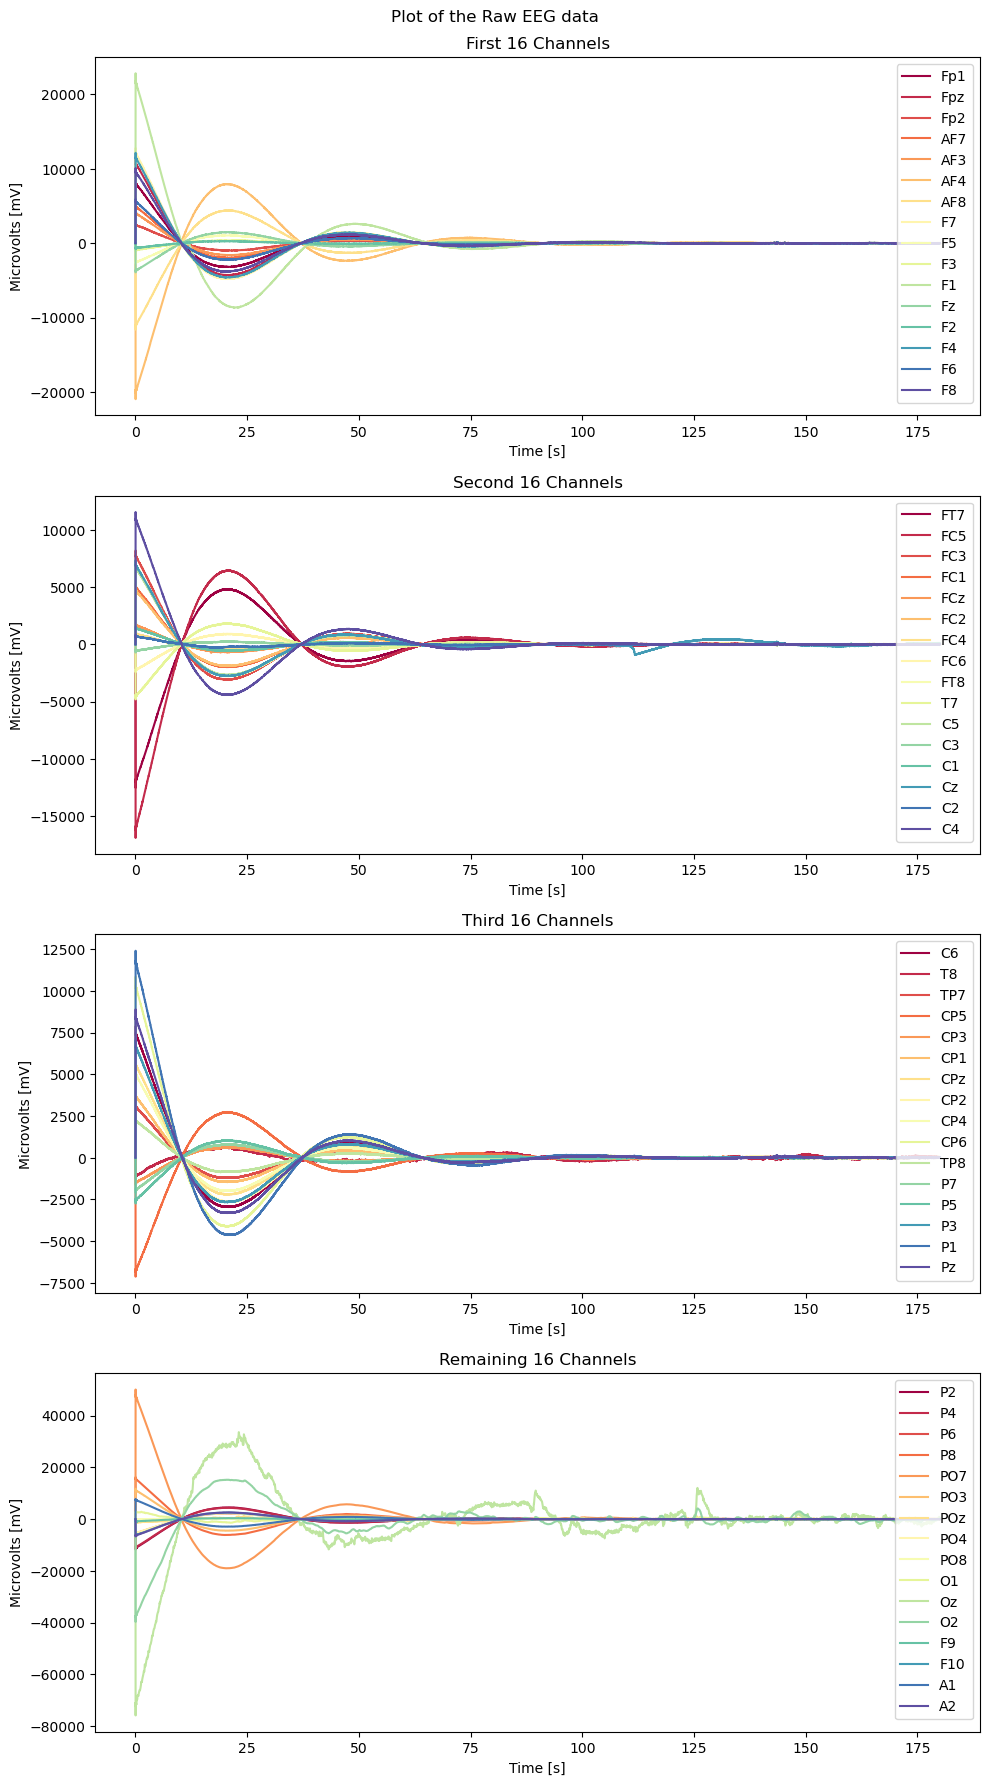

In [27]:
plot_the_eeg_data_subplots(raw_data,title,list_of_channels_names)

In [28]:
print(raw.info['ch_names'])

['Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'F9', 'F10', 'A1', 'A2']


In [29]:
reference_channels = list_of_channels_names[62:]

In [30]:
referenced_raw = raw.copy().set_eeg_reference(ref_channels=reference_channels)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


In [31]:
referenced_raw_dataframe = referenced_raw.to_data_frame(copy=True)

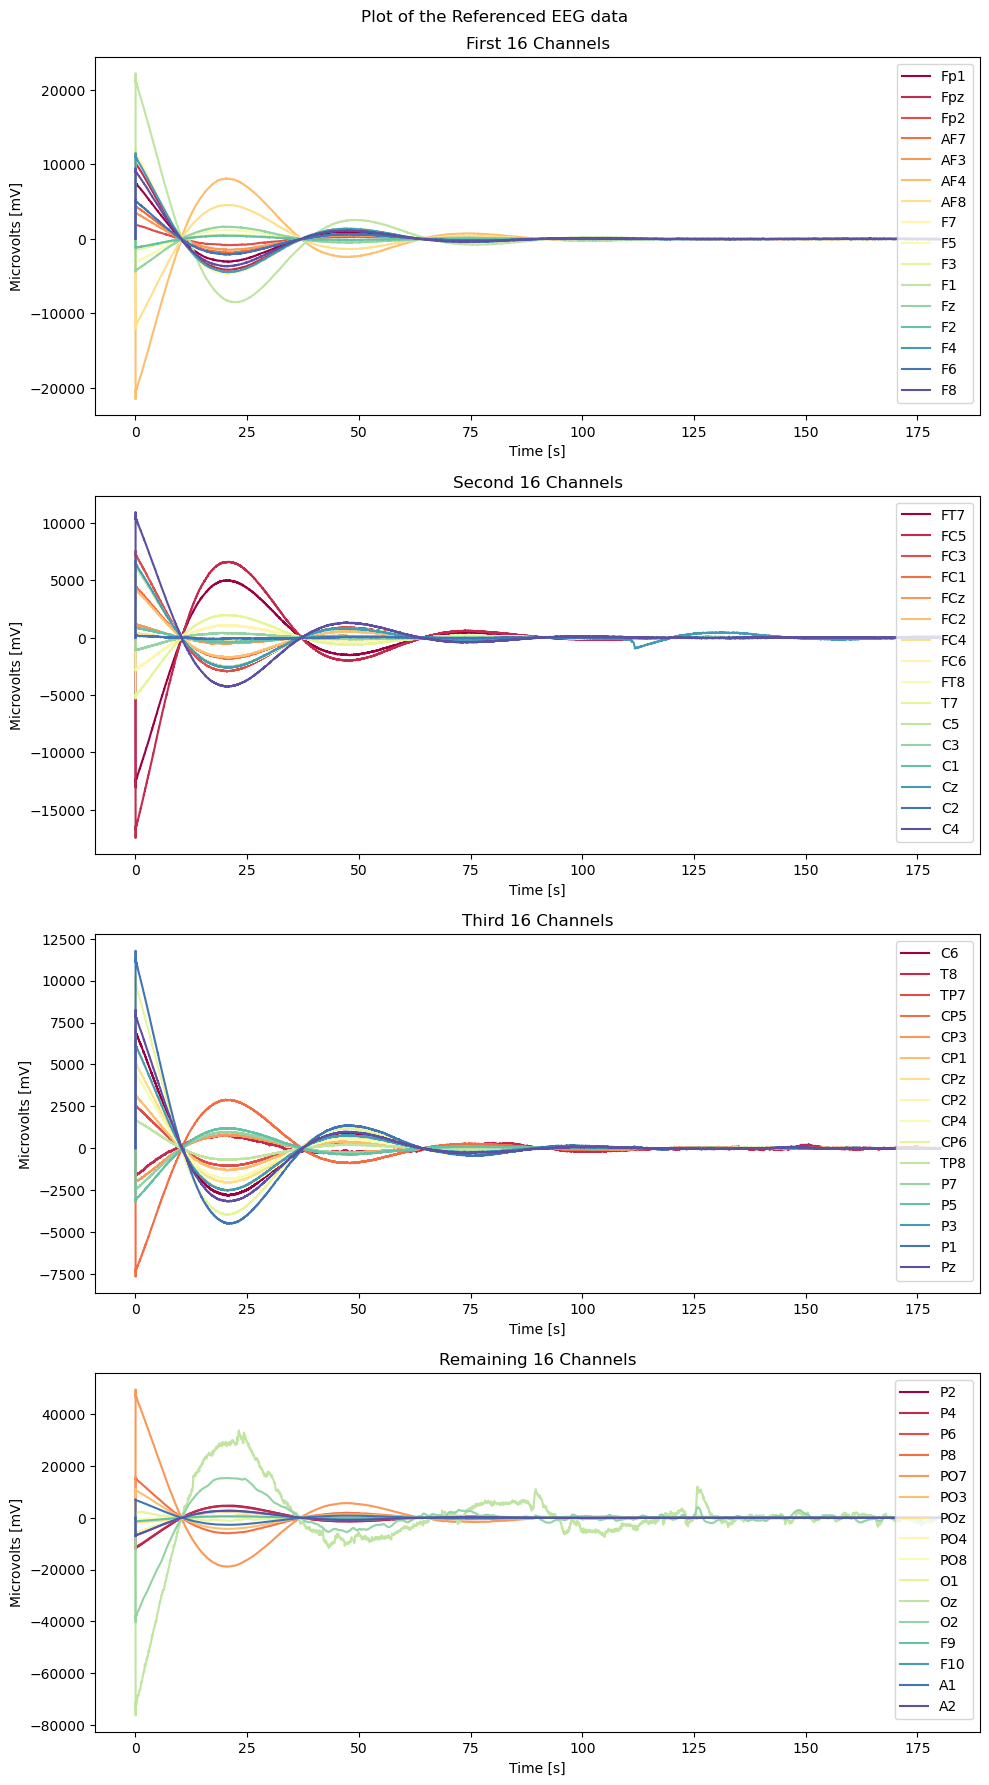

In [32]:
#referenced_raw.plot()
title = 'Plot of the Referenced EEG data'
#plot_the_eeg_data(referenced_raw_dataframe,title,list_of_channels_names)
plot_the_eeg_data_subplots(referenced_raw_dataframe,title,list_of_channels_names)

In [33]:
seconds_to_remove = 90

In [34]:
croped_referenced_raw = referenced_raw.copy().crop(tmin=seconds_to_remove, tmax=180.0156)

In [35]:
croped__raw_dataframe = croped_referenced_raw.to_data_frame(copy=True)

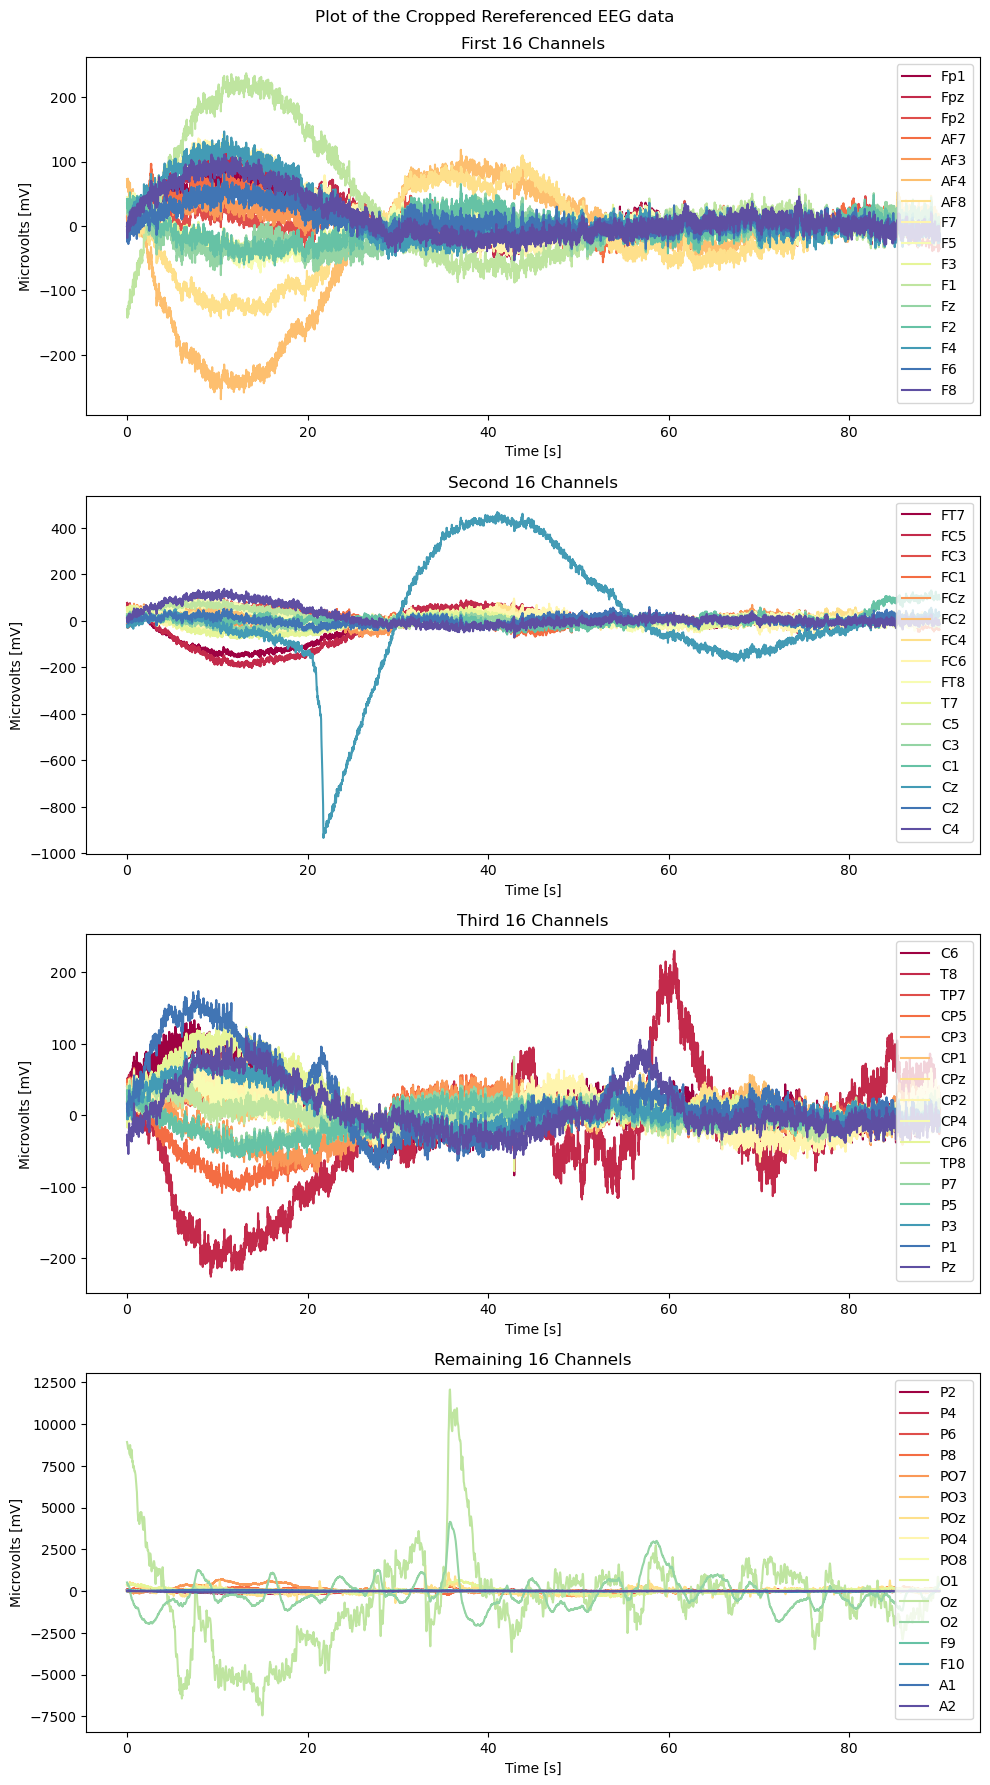

In [36]:
title = 'Plot of the Cropped Rereferenced EEG data'
#plot_the_eeg_data(croped__raw_dataframe,title,list_of_channels_names)
plot_the_eeg_data_subplots(croped__raw_dataframe,title,list_of_channels_names)

In [37]:
max_cutoff_amplitude = 500 #Criteria for the bad channel amplitude

In [38]:
abs_voltages = croped__raw_dataframe.iloc[:,1:].abs()

In [39]:
large_value_counts = abs_voltages[abs_voltages>=max_cutoff_amplitude].count()

In [40]:
temp_bad_channels_counts = large_value_counts[large_value_counts>0]

In [41]:
num_data_points = croped__raw_dataframe.shape[0]

In [42]:
print(temp_bad_channels_counts)

Cz      1993
PO7     2215
POz      622
O1      1049
Oz     36392
O2     26566
dtype: int64


In [43]:
temp_bad_channels_ratio = (temp_bad_channels_counts/num_data_points).sort_values(ascending = True)

In [44]:
print(temp_bad_channels_ratio)

POz    0.013496
O1     0.022760
Cz     0.043242
PO7    0.048059
O2     0.576407
Oz     0.789603
dtype: float64


In [45]:
#plot_the_eeg_data(croped__raw_dataframe,title,['Cz'])

In [46]:
min_cutoff_ratio = 0.003  #minimum ratio between the large value points and the total data points to remove the bad channels

In [47]:
bad_channels = list(temp_bad_channels_ratio[temp_bad_channels_ratio>=min_cutoff_ratio].index)

In [48]:
print("bad_channels",bad_channels)

bad_channels ['POz', 'O1', 'Cz', 'PO7', 'O2', 'Oz']


In [50]:
croped__raw_dataframe = croped__raw_dataframe.drop(columns =bad_channels )

In [51]:
title = 'visualize the channels after removal of large_range channels'
#plot_the_eeg_data(croped__raw_dataframe,title,croped__raw_dataframe.columns[1:])

In [52]:
sorted_std_channels = croped__raw_dataframe.iloc[:,1:].std().sort_values(ascending = False)

In [53]:
mean_std = sorted_std_channels.mean()
print('mean value of channel std',mean_std)
std_of_std = sorted_std_channels.std()
print('std of channel std',std_of_std)

mean value of channel std 33.880278949857136
std of channel std 19.926646622711168


<Axes: >

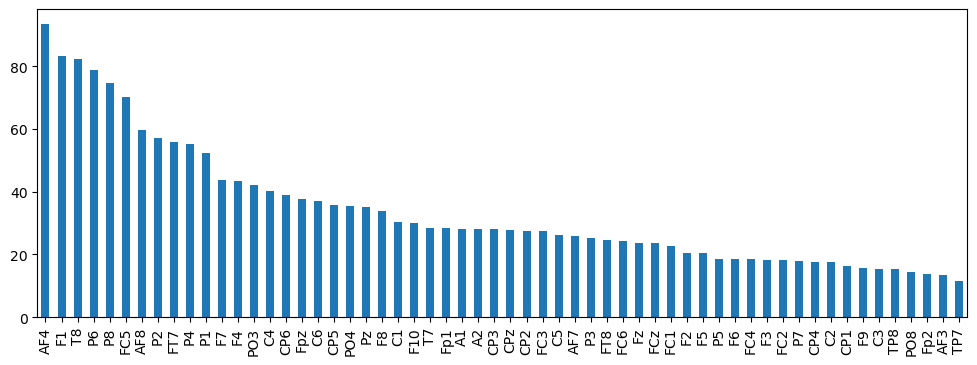

In [54]:
sorted_std_channels.plot(kind = 'bar',figsize = (12,4))

In [55]:
print(sorted_std_channels[:10])

AF4    93.545131
F1     83.343638
T8     82.381421
P6     78.713222
P8     74.479212
FC5    70.326274
AF8    59.496087
P2     57.197372
FT7    55.776011
P4     55.126569
dtype: float64


In [56]:
channels_to_remove = ['AF4'] #visualize individual channels

In [57]:
title = 'Cropped Data After Bad Channels Removal'
#plot_the_eeg_data(croped__raw_dataframe,title,channels_to_remove)

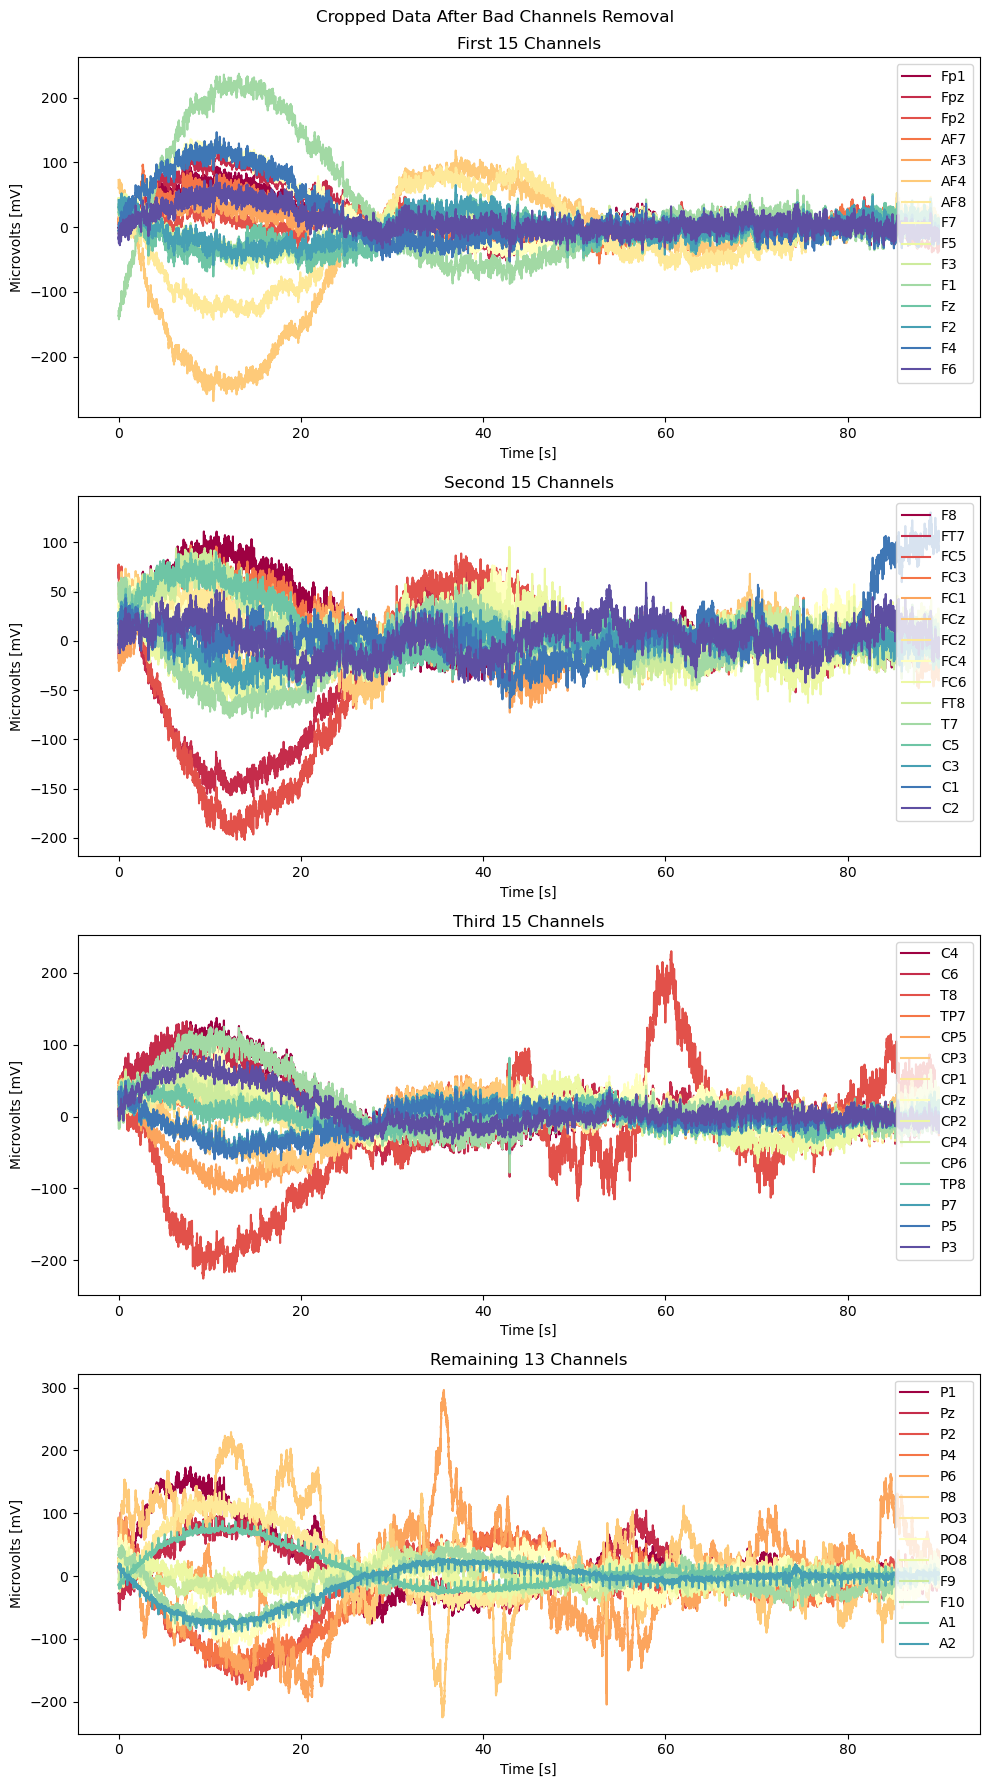

In [58]:
plot_the_eeg_data_subplots(croped__raw_dataframe,title,croped__raw_dataframe.columns[1:])

In [60]:
bad_removed_eeg = croped_referenced_raw.copy().drop_channels(bad_channels)

In [61]:
new_channels = croped__raw_dataframe.columns[1:]

In [62]:
raw_welch_psd = bad_removed_eeg.compute_psd(method='welch',n_fft=int(20*512))

Effective window size : 20.000 (s)


In [63]:
#raw_welch_psd.plot(dB = True)

In [64]:
raw_psd_df = raw_welch_psd.to_data_frame(copy=True)

In [65]:
raw_psd_df.iloc[:,1:] = 10*np.log10(raw_psd_df.iloc[:,1:]*1e12)

In [66]:
def plot_the_psd_data(data,title,channel_names,freq_range = (0,0),fig_size = (12,16)):
    #display psd data in one figure,freq_range requires a (min_freq,max_freq)
    #data must be dataframe format, must have frequeny column
    if freq_range == (0,0):
        selected_freq_psd = data
    else:
        start,end = freq_range
        selected_freq_psd = data[(data['freq']>=start) & (data['freq']<end)]
    x = selected_freq_psd['freq']
    y = selected_freq_psd[channel_names]
    #cm = plt.get_cmap('gist_rainbow')
    plt.figure(figsize=fig_size)
    ax = plt.subplot(111)
    num_channels = len(channel_names)
    colors = plt.cm.Spectral(np.linspace(0,1,num_channels))
    #ax.set_prop_cycle(color=[cm(1.*i/num_channels) for i in range(num_channels)])
    ax.set_prop_cycle(color = colors)
    ax.plot(x, y)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Power/Frequency [dB/Hz]')
    ax.set_title(title)
    ax.legend(channel_names,borderpad=0.2,loc = 'upper right')
    plt.show()

In [67]:
title = 'Full PSD'
#plot_the_psd_data(raw_psd_df,title,new_channels)

In [68]:
title = 'PSD from 0-30 Hz'
#plot_the_psd_data(raw_psd_df,title,new_channels,(0,30))

In [69]:
low_cut = 0.1
hi_cut  = 30
raw_filt = bad_removed_eeg.copy().filter(low_cut,hi_cut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16897 samples (33.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [70]:
raw_filt = raw_filt.copy().notch_filter(60, method='fir')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [71]:
raw_filt_dataframe = raw_filt.to_data_frame(copy=True)

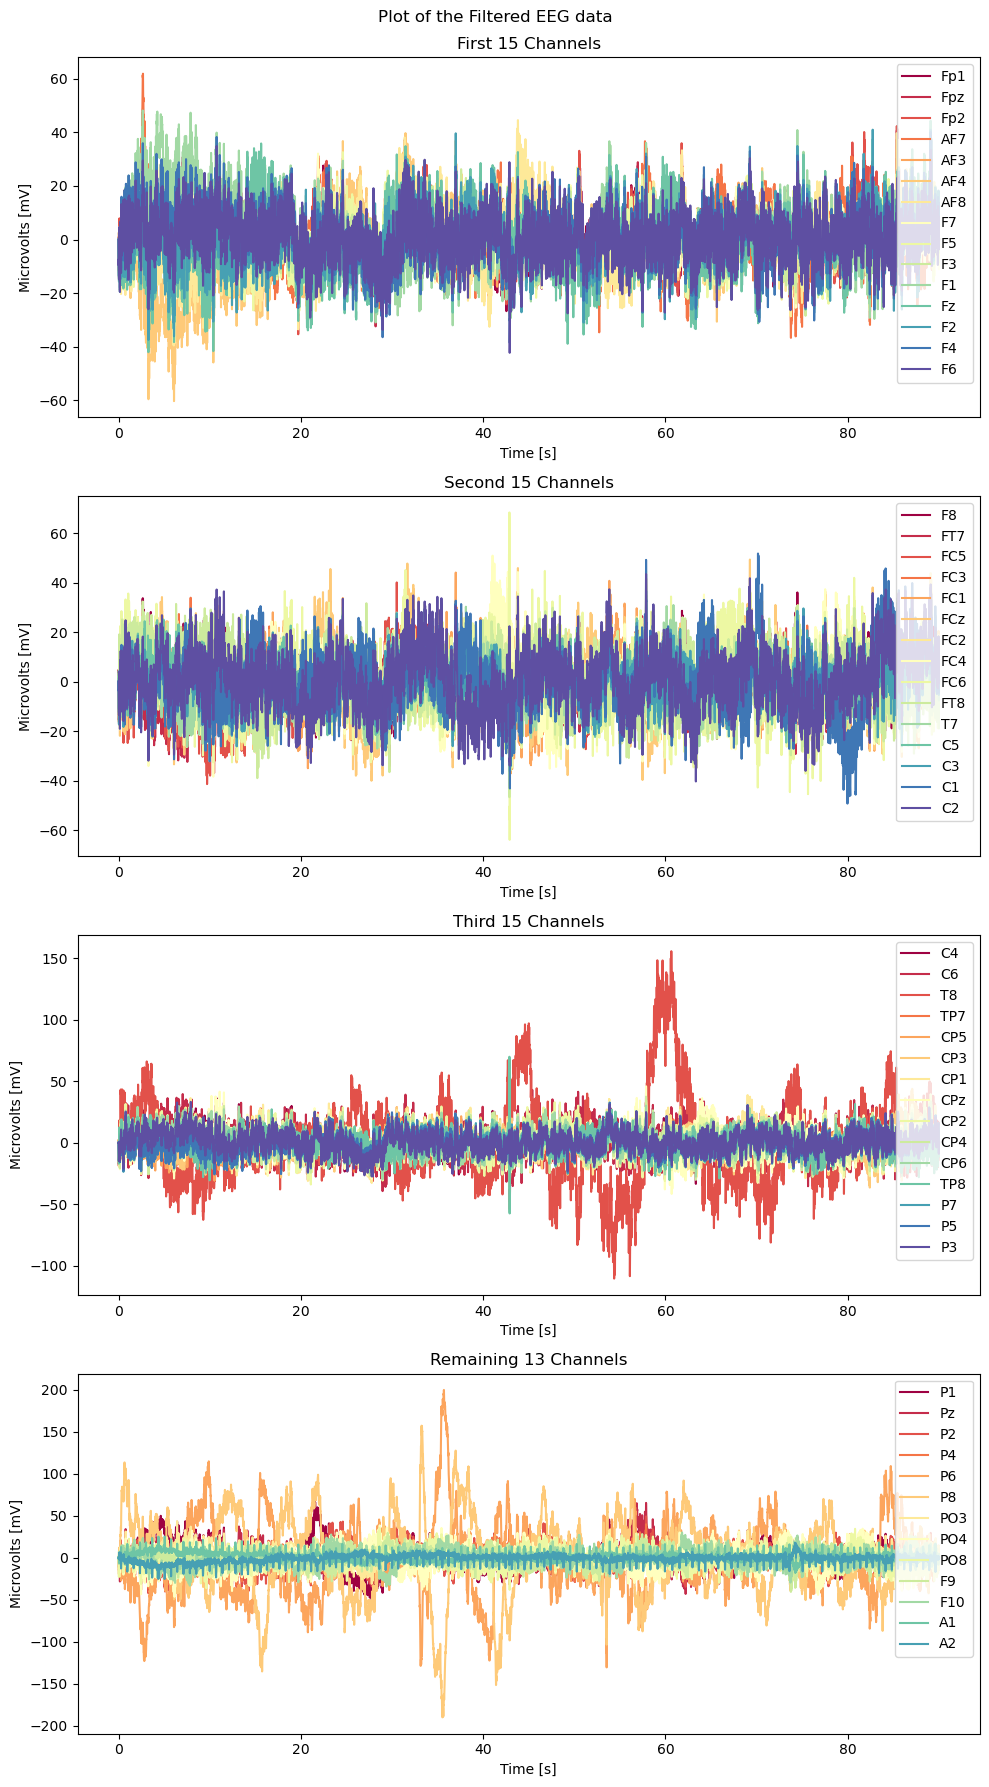

In [72]:
title = 'Plot of the Filtered EEG data'
plot_the_eeg_data_subplots(raw_filt_dataframe,title,new_channels)

In [ ]:
#plot_the_eeg_data(raw_filt_dataframe,title,raw_filt_dataframe.columns[1:],fig_size = (12,16))

In [73]:
raw_filt_welch_psd = raw_filt.compute_psd(method='welch',n_fft=int(20*512))

Effective window size : 20.000 (s)


In [74]:
#raw_filt_welch_psd.plot()

In [75]:
raw_filt_psd_df = raw_filt_welch_psd.to_data_frame(copy=True)
raw_filt_psd_df.iloc[:,1:] = 10*np.log10(raw_filt_psd_df.iloc[:,1:]*1e12)

In [76]:
title = 'Full PSD of Filtered Data'
#plot_the_psd_data(raw_filt_psd_df,title,new_channels)

In [77]:
#title = 'PSD from 0-30 Hz of Filtered Data'
#plot_the_psd_data(raw_filt_psd_df,title,new_channels,(0,30))

In [78]:
print(len(new_channels))

58


In [79]:
ica = mne.preprocessing.ICA(n_components=56,max_iter='auto',random_state=97)

In [80]:
raw_for_ica = raw_filt.copy().filter(l_freq=1, h_freq=None)
ica.fit(raw_for_ica)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1691 samples (3.303 s)

Fitting ICA to data using 58 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 56 components
Fitting ICA took 309.7s.


C:\Users\81236\anaconda3\envs\mne\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 46089 samples), 56 ICA components (58 PCA components available), channel types: eeg, no sources marked for exclusion>

In [81]:
ica.plot_sources(raw_for_ica,show_scrollbars=True)

Creating RawArray with float64 data, n_channels=56, n_times=46089
    Range : 46080 ... 92168 =     90.000 ...   180.016 secs
Ready.
Using qt as 2D backend.


In [82]:
remove_list = [0,3,5,9]

Applying ICA to Raw instance
    Transforming to ICA space (56 components)
    Zeroing out 4 ICA components
    Projecting back using 58 PCA components


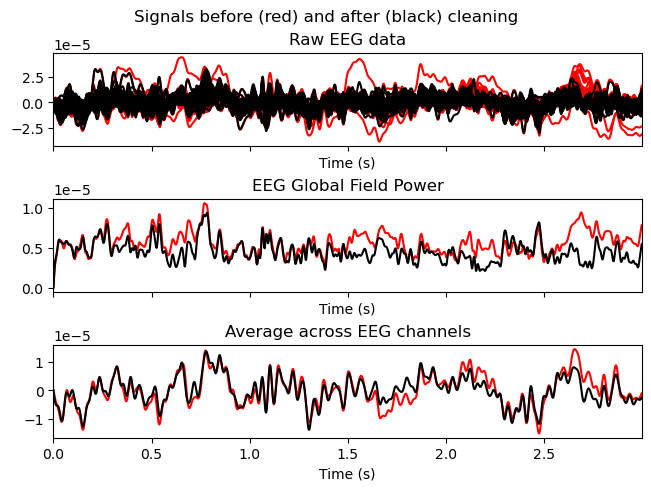

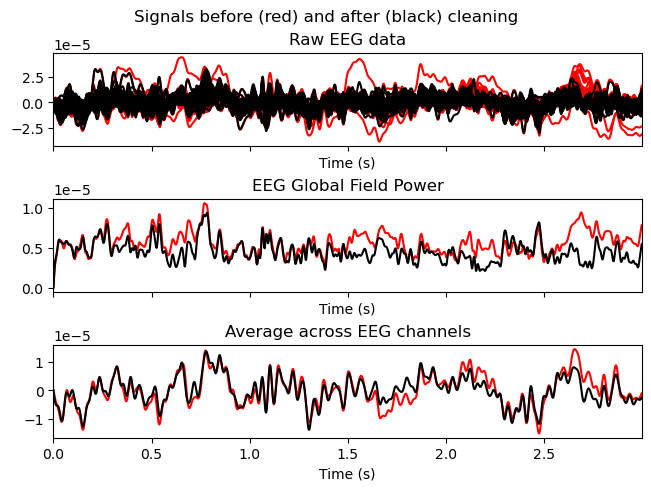

In [89]:
ica.plot_overlay(raw_for_ica, exclude=remove_list)

In [90]:
ica.exclude = remove_list

In [91]:
ica.apply(raw_filt)

Applying ICA to Raw instance
    Transforming to ICA space (56 components)
    Zeroing out 4 ICA components
    Projecting back using 58 PCA components


<RawArray | 58 x 46089 (90.0 s), ~20.5 MB, data loaded>

In [ ]:
#sources = ica.get_sources(raw_for_ica)

In [ ]:
#ica_components_data_frame = sources.to_data_frame(copy=True)

In [ ]:
#ica_components_data_frame.shape

In [ ]:
#ICA_columns = ica_components_data_frame.columns[1:]

In [ ]:
#title = 'plot of all ICA components'

In [ ]:
#plot_the_eeg_data(ica_components_data_frame,title,ICA_columns[30],time_range = (80,120),fig_size = (15,12),sampling_freq = 512)

In [92]:
after_ica_dataframe = raw_filt.to_data_frame(copy=True)

In [93]:
title = 'plot of data after ICA removal'

In [ ]:
#plot_the_eeg_data(after_ica_dataframe,title,new_channels,time_range = (0,0),fig_size = (15,12),sampling_freq = 512)

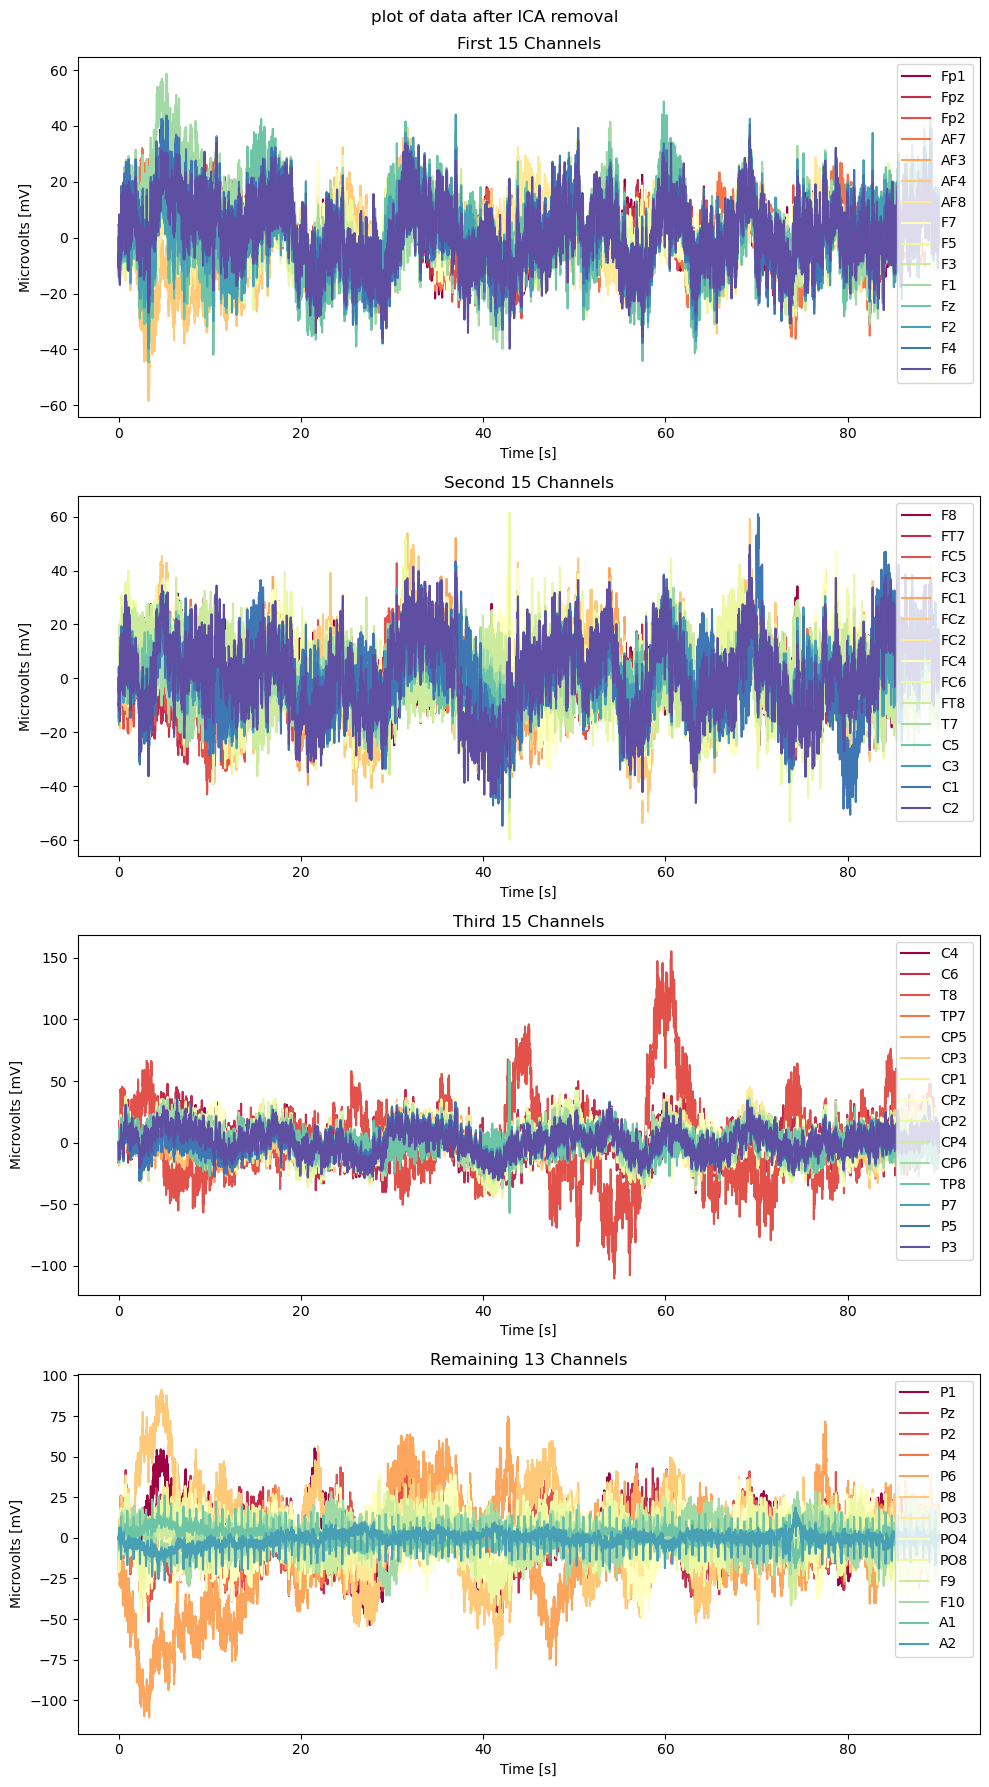

In [94]:
plot_the_eeg_data_subplots(after_ica_dataframe,title,new_channels,sampling_freq = 512)

In [95]:
afterICA_welch_psd = raw_filt.compute_psd(method='welch',n_fft=int(20*512))

Effective window size : 20.000 (s)


In [ ]:
#afterICA_welch_psd.plot()

In [96]:
afterICA_psd_df = afterICA_welch_psd.to_data_frame(copy=True)
afterICA_psd_df.iloc[:,1:] = 10*np.log10(afterICA_psd_df.iloc[:,1:]*1e12)

In [97]:
title = 'Full PSD of afterICA data'
#plot_the_psd_data(afterICA_psd_df,title,new_channels)

In [99]:
title = 'PSD from 0-30 Hz of afterICA data'
#plot_the_psd_data(afterICA_psd_df,title,new_channels,freq_range = (0,30))

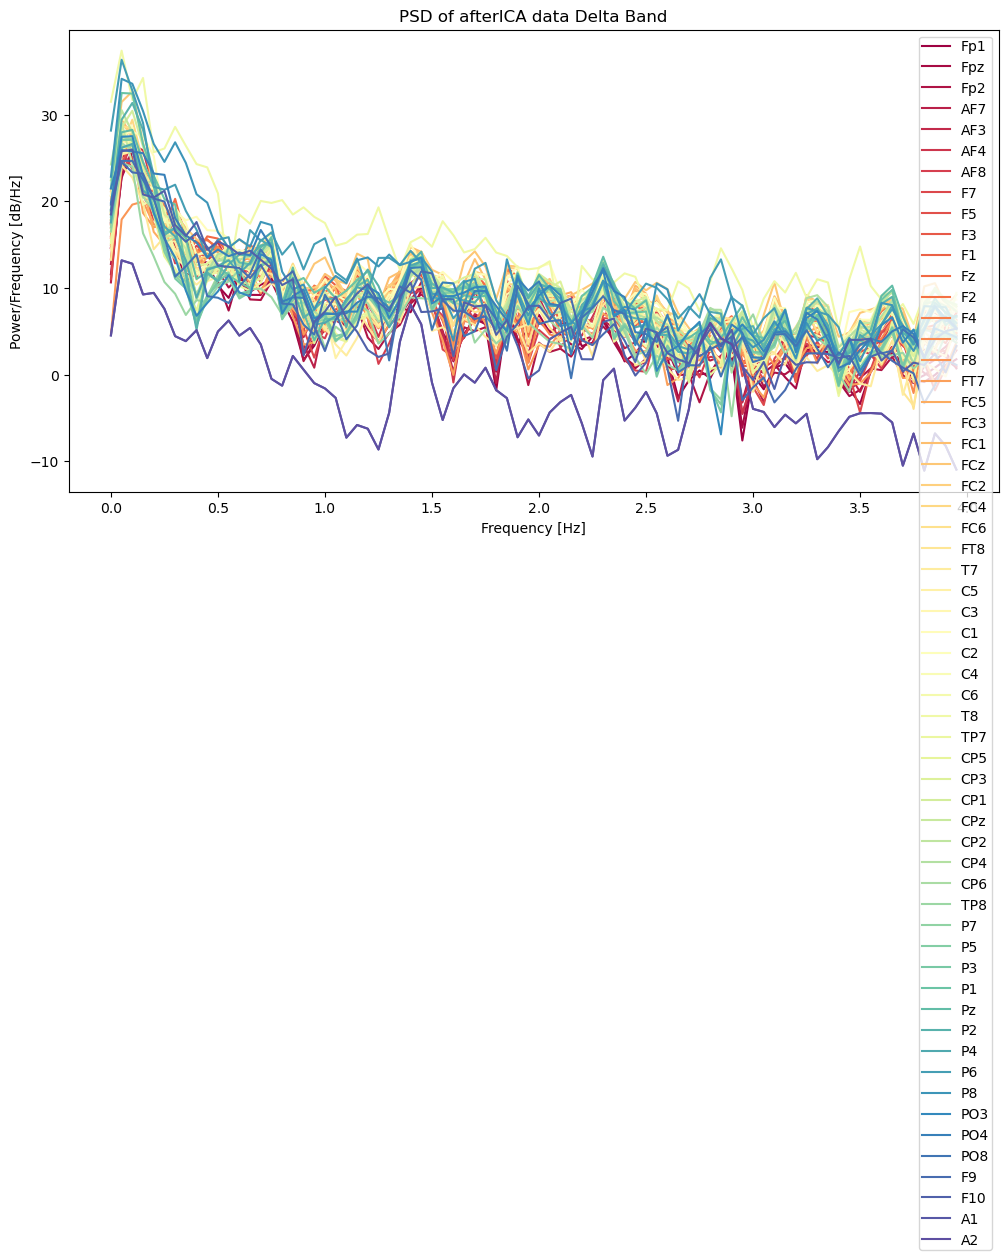

In [102]:
title = 'PSD of afterICA data Delta Band'
plot_the_psd_data(afterICA_psd_df,title,new_channels,freq_range = (0,4),fig_size = (12,6))

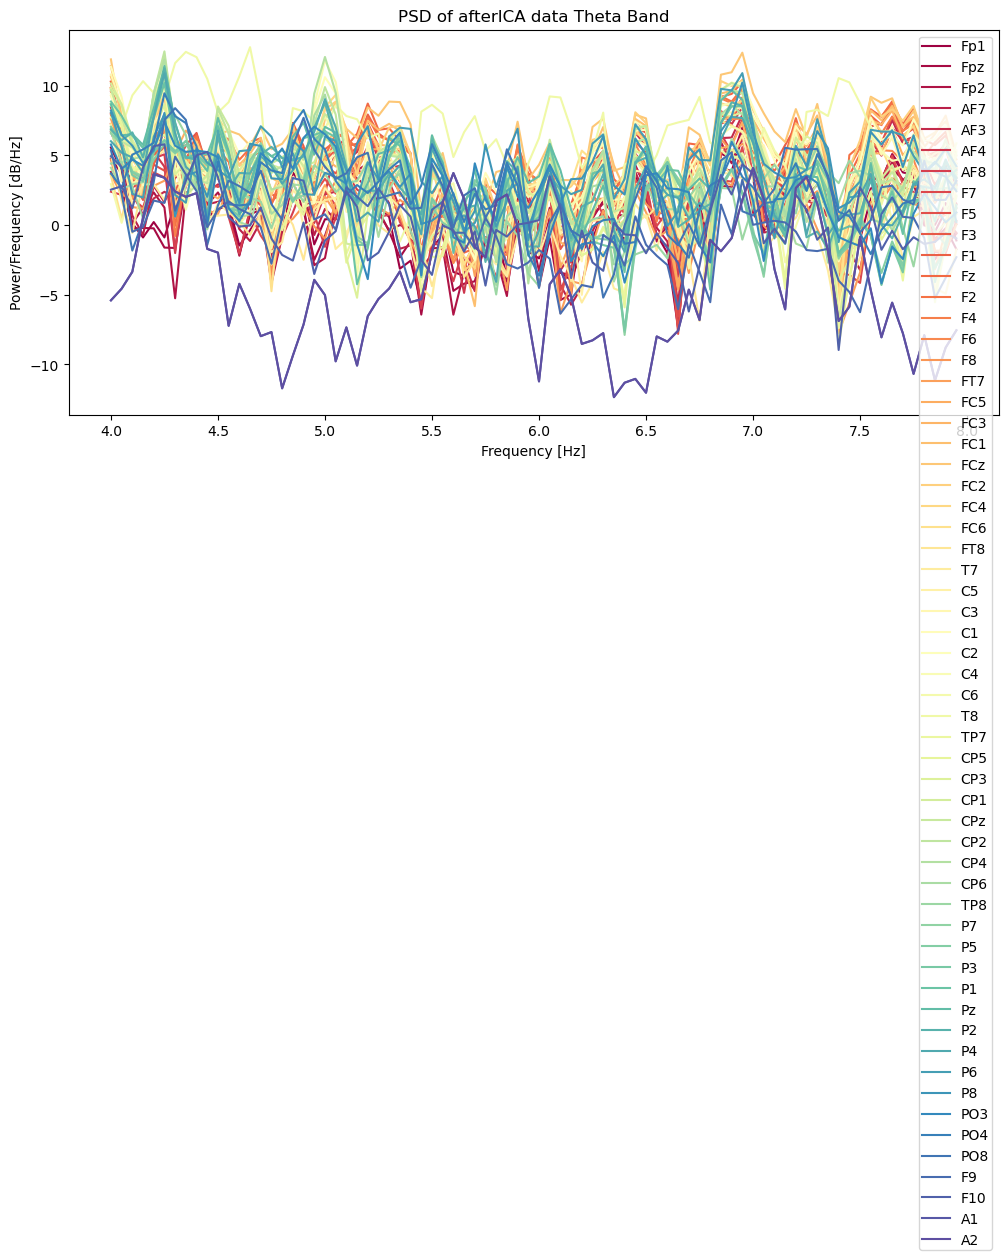

In [105]:
title = 'PSD of afterICA data Theta Band'
plot_the_psd_data(afterICA_psd_df,title,new_channels,freq_range = (4,8),fig_size = (12,5))

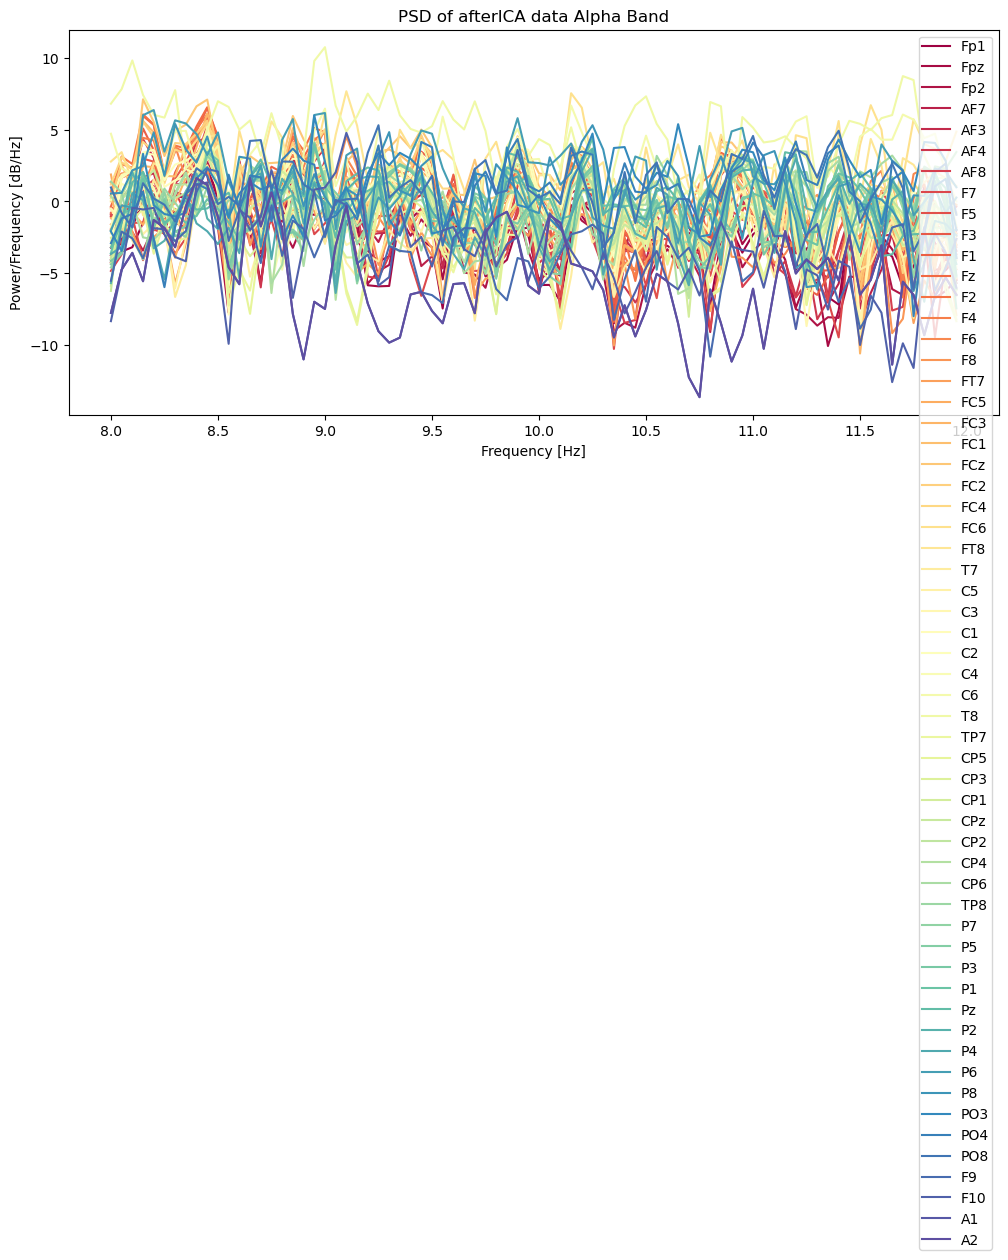

In [106]:
title = 'PSD of afterICA data Alpha Band'
plot_the_psd_data(afterICA_psd_df,title,new_channels,freq_range = (8,12),fig_size = (12,5))

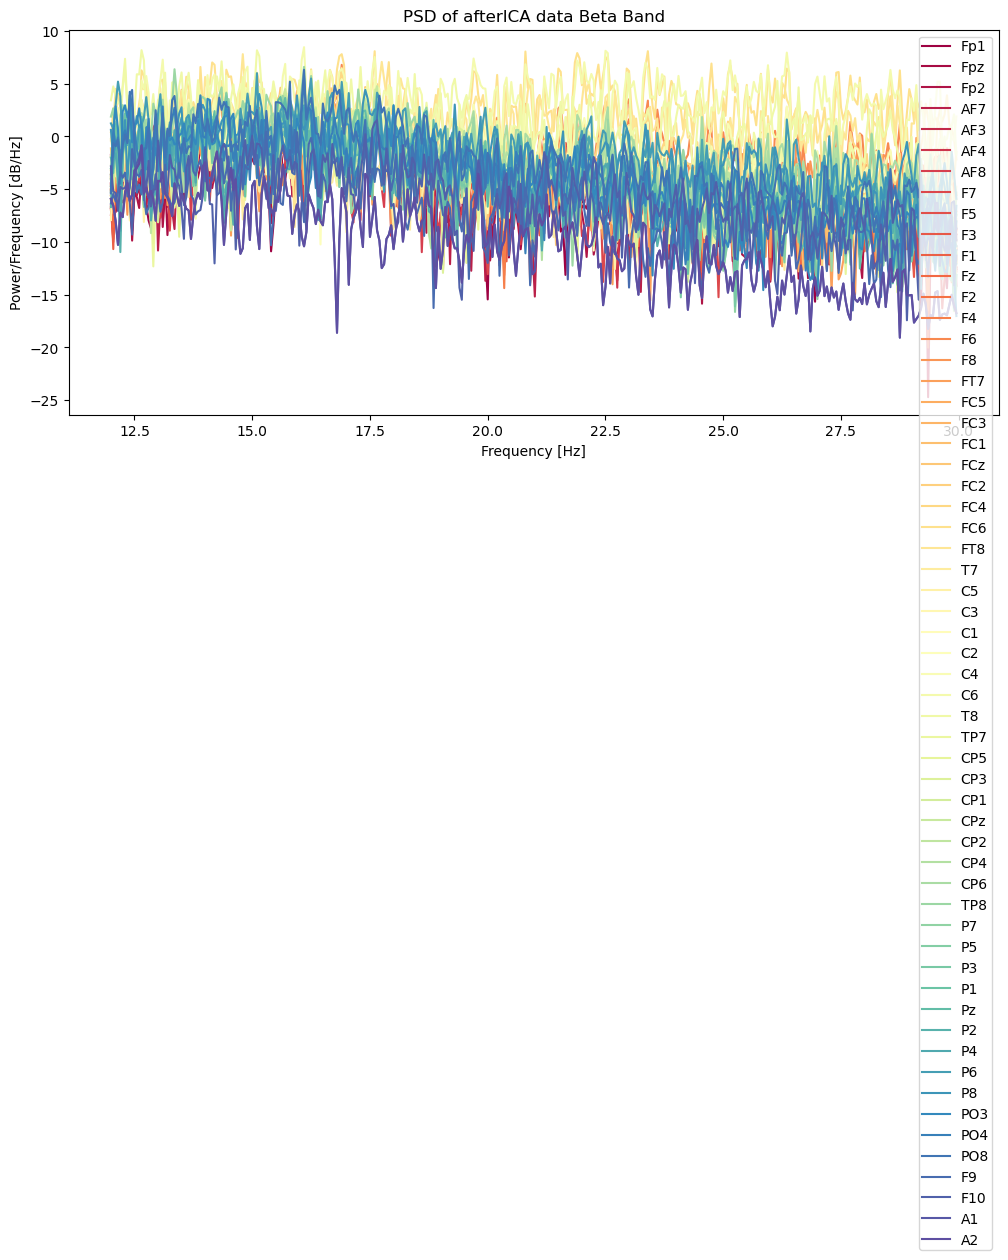

In [107]:
title = 'PSD of afterICA data Beta Band'
plot_the_psd_data(afterICA_psd_df,title,new_channels,freq_range = (12,30),fig_size = (12,5))

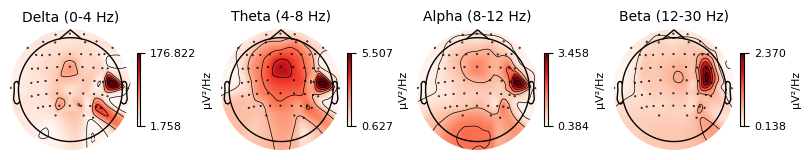

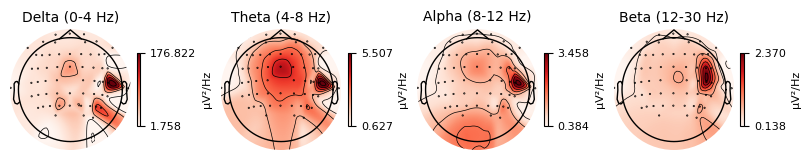

In [108]:
afterICA_welch_psd.plot_topomap(bands = {'Delta (0-4 Hz)': (0, 4), 'Theta (4-8 Hz)': (4, 8),
'Alpha (8-12 Hz)': (8, 12), 'Beta (12-30 Hz)': (12, 30)},cmap = 'Reds')

In [ ]:
def compute_the_average_band_power(psd,band_range):
    band_low,band_high = band_range
    psd_in_selected_band = psd[(psd['freq']>=band_low) & (psd['freq']<band_high)]
    average_band_power = psd_in_selected_band.mean()
    return average_band_power

In [ ]:
#compute_the_average_band_power(afterICA_psd_df,(0,3)).plot(kind = "bar")

In [ ]:
#compute_the_average_band_power(afterICA_psd_df,(3,7))

In [ ]:
tuples_of_bands = ((0,3),(3,7),(7,12),(12,30))

In [ ]:
def compute_the_relative_band_power(psd,tuples_of_bands):
    band_sum = 0
    list_of_bands = []
    for band_tuple in tuples_of_bands:
        band_low,band_high = band_tuple
        psd_in_selected_band = psd[(psd['freq']>=band_low) & (psd['freq']<band_high)]
        sum_of_band = psd_in_selected_band.iloc[:,1:].sum()
        list_of_bands.append(sum_of_band)
        band_sum+= sum_of_band
    return list_of_bands,band_sum